# Paper 2: Results Comparison

## Comprehensive Performance Analysis of All 5 Models

This notebook:
1. Loads results from all 5 trained models
2. Creates comparison tables (matching Paper 2 Table 9 & Table 10)
3. Generates comparative visualizations
4. Identifies best model
5. Analyzes trade-offs (accuracy vs computational cost)

**Models Compared:**
1. CNNs-without-Aug (Target: 99.22%)
2. CNNs-with-Aug (Target: 99.61%)
3. CNN-LSTM-with-Aug (Target: 99.92%) ⭐ BEST
4. CNN-SVM-with-Aug (Target: 99.14%)
5. VGG16-SVM-with-Aug (Target: 98.67%)

In [4]:
%run 00_utils_and_config.ipynb

PyTorch version: 2.9.1+cu130
CUDA available: True
CUDA version: 13.0
GPU: NVIDIA GeForce RTX 3060 Laptop GPU
Device: cuda
Configuration loaded successfully!

Base path: C:\Users\rishi\CV_Assignment\Paper2
Raw data path: C:\Users\rishi\CV_Assignment\Paper2\Raw_Data
Number of models: 5
Data processing functions loaded successfully!
Evaluation metrics functions loaded successfully!
Visualization functions loaded successfully!
Data augmentation setup loaded successfully!

PAPER 2 UTILITIES AND CONFIGURATION - SUMMARY

✓ All libraries imported successfully
✓ Configuration parameters loaded
✓ Data processing functions defined
✓ Evaluation metrics functions defined
✓ Visualization functions defined
✓ Data augmentation configured

Ready to proceed with:
  - Notebook 01: Data Preparation
  - Notebooks 02-06: Model Implementations
  - Notebook 07: Results Comparison



## 1. Load All Model Results

In [5]:
# Load results from all models
results_all = {}
model_names = ["model1", "model2", "model3", "model4", "model5"]
model_display_names = [
    "CNNs-without-Aug",
    "CNNs-with-Aug",
    "CNN-LSTM-with-Aug",
    "CNN-SVM-with-Aug",
    "VGG16-SVM-with-Aug"
]

print("Loading model results...\n")
for model_name, display_name in zip(model_names, model_display_names):
    result_file = CONFIG['results_path'] / f"{model_name}_results.json"
    if result_file.exists():
        with open(result_file) as f:
            results_all[display_name] = json.load(f)
        print(f"✓ Loaded {display_name}")
    else:
        print(f"⚠ {display_name} results not found (may need to run training notebook)")

print(f"\nTotal models loaded: {len(results_all)}/5")

Loading model results...

✓ Loaded CNNs-without-Aug
✓ Loaded CNNs-with-Aug
✓ Loaded CNN-LSTM-with-Aug
✓ Loaded CNN-SVM-with-Aug
⚠ VGG16-SVM-with-Aug results not found (may need to run training notebook)

Total models loaded: 4/5


## 2. Create Comparison Table (Paper 2 Style)

In [6]:
# Create comparison dataframe matching Paper 2 Table 9 & Table 10
comparison_data = []

for model_name, results in results_all.items():
    comparison_data.append({
        "Model": model_name,
        "Accuracy": f"{results.get('accuracy', 0)*100:.2f}%",
        "Precision": f"{results.get('precision', 0)*100:.2f}%",
        "Recall": f"{results.get('recall', 0)*100:.2f}%",
        "F1-Score": f"{results.get('f1_score', 0)*100:.2f}%",
        "Specificity": f"{results.get('specificity', 0)*100:.2f}%",
        "Train Time (s)": f"{results.get('training_time_seconds', 0):.1f}",
        "Test Time (ms)": f"{results.get('testing_time_ms', 0):.1f}"
    })

df_comparison = pd.DataFrame(comparison_data)

print("\n" + "="*100)
print("MODEL COMPARISON TABLE (Matching Paper 2 Table 9 & Table 10)")
print("="*100)
print(df_comparison.to_string(index=False))
print("="*100)

# Save to CSV
df_comparison.to_csv(CONFIG['results_path'] / 'all_models_comparison.csv', index=False)
print("\n✓ Saved to all_models_comparison.csv")


MODEL COMPARISON TABLE (Matching Paper 2 Table 9 & Table 10)
            Model Accuracy Precision Recall F1-Score Specificity Train Time (s) Test Time (ms)
 CNNs-without-Aug   98.45%    98.57% 97.96%   98.26%      98.84%          443.5         1105.1
    CNNs-with-Aug   66.64%    69.69% 45.42%   54.99%      83.91%          474.7          649.0
CNN-LSTM-with-Aug   97.99%    97.57% 97.96%   97.76%      98.01%          108.1          340.5
 CNN-SVM-with-Aug   56.31%    84.21%  3.26%    6.27%       0.00%            0.0            0.0

✓ Saved to all_models_comparison.csv


## 3. Identify Best Model

In [7]:
# Find model with highest accuracy
if results_all:
    accuracies = {name: res.get('accuracy', 0) for name, res in results_all.items()}
    best_model = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_model]
    
    print(f"\n⭐ BEST MODEL: {best_model}")
    print(f"   Accuracy: {best_accuracy*100:.2f}%")
    print(f"\n   Expected (Paper 2): CNN-LSTM-with-Aug with 99.92%")
    
    # Rankings
    ranked = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
    print(f"\nModel Rankings (by accuracy):")
    for i, (name, acc) in enumerate(ranked, 1):
        print(f"  {i}. {name}: {acc*100:.2f}%")
else:
    print("\n⚠ No model results loaded. Please run training notebooks first.")


⭐ BEST MODEL: CNNs-without-Aug
   Accuracy: 98.45%

   Expected (Paper 2): CNN-LSTM-with-Aug with 99.92%

Model Rankings (by accuracy):
  1. CNNs-without-Aug: 98.45%
  2. CNN-LSTM-with-Aug: 97.99%
  3. CNNs-with-Aug: 66.64%
  4. CNN-SVM-with-Aug: 56.31%


## 4. Visualize Performance Comparisons

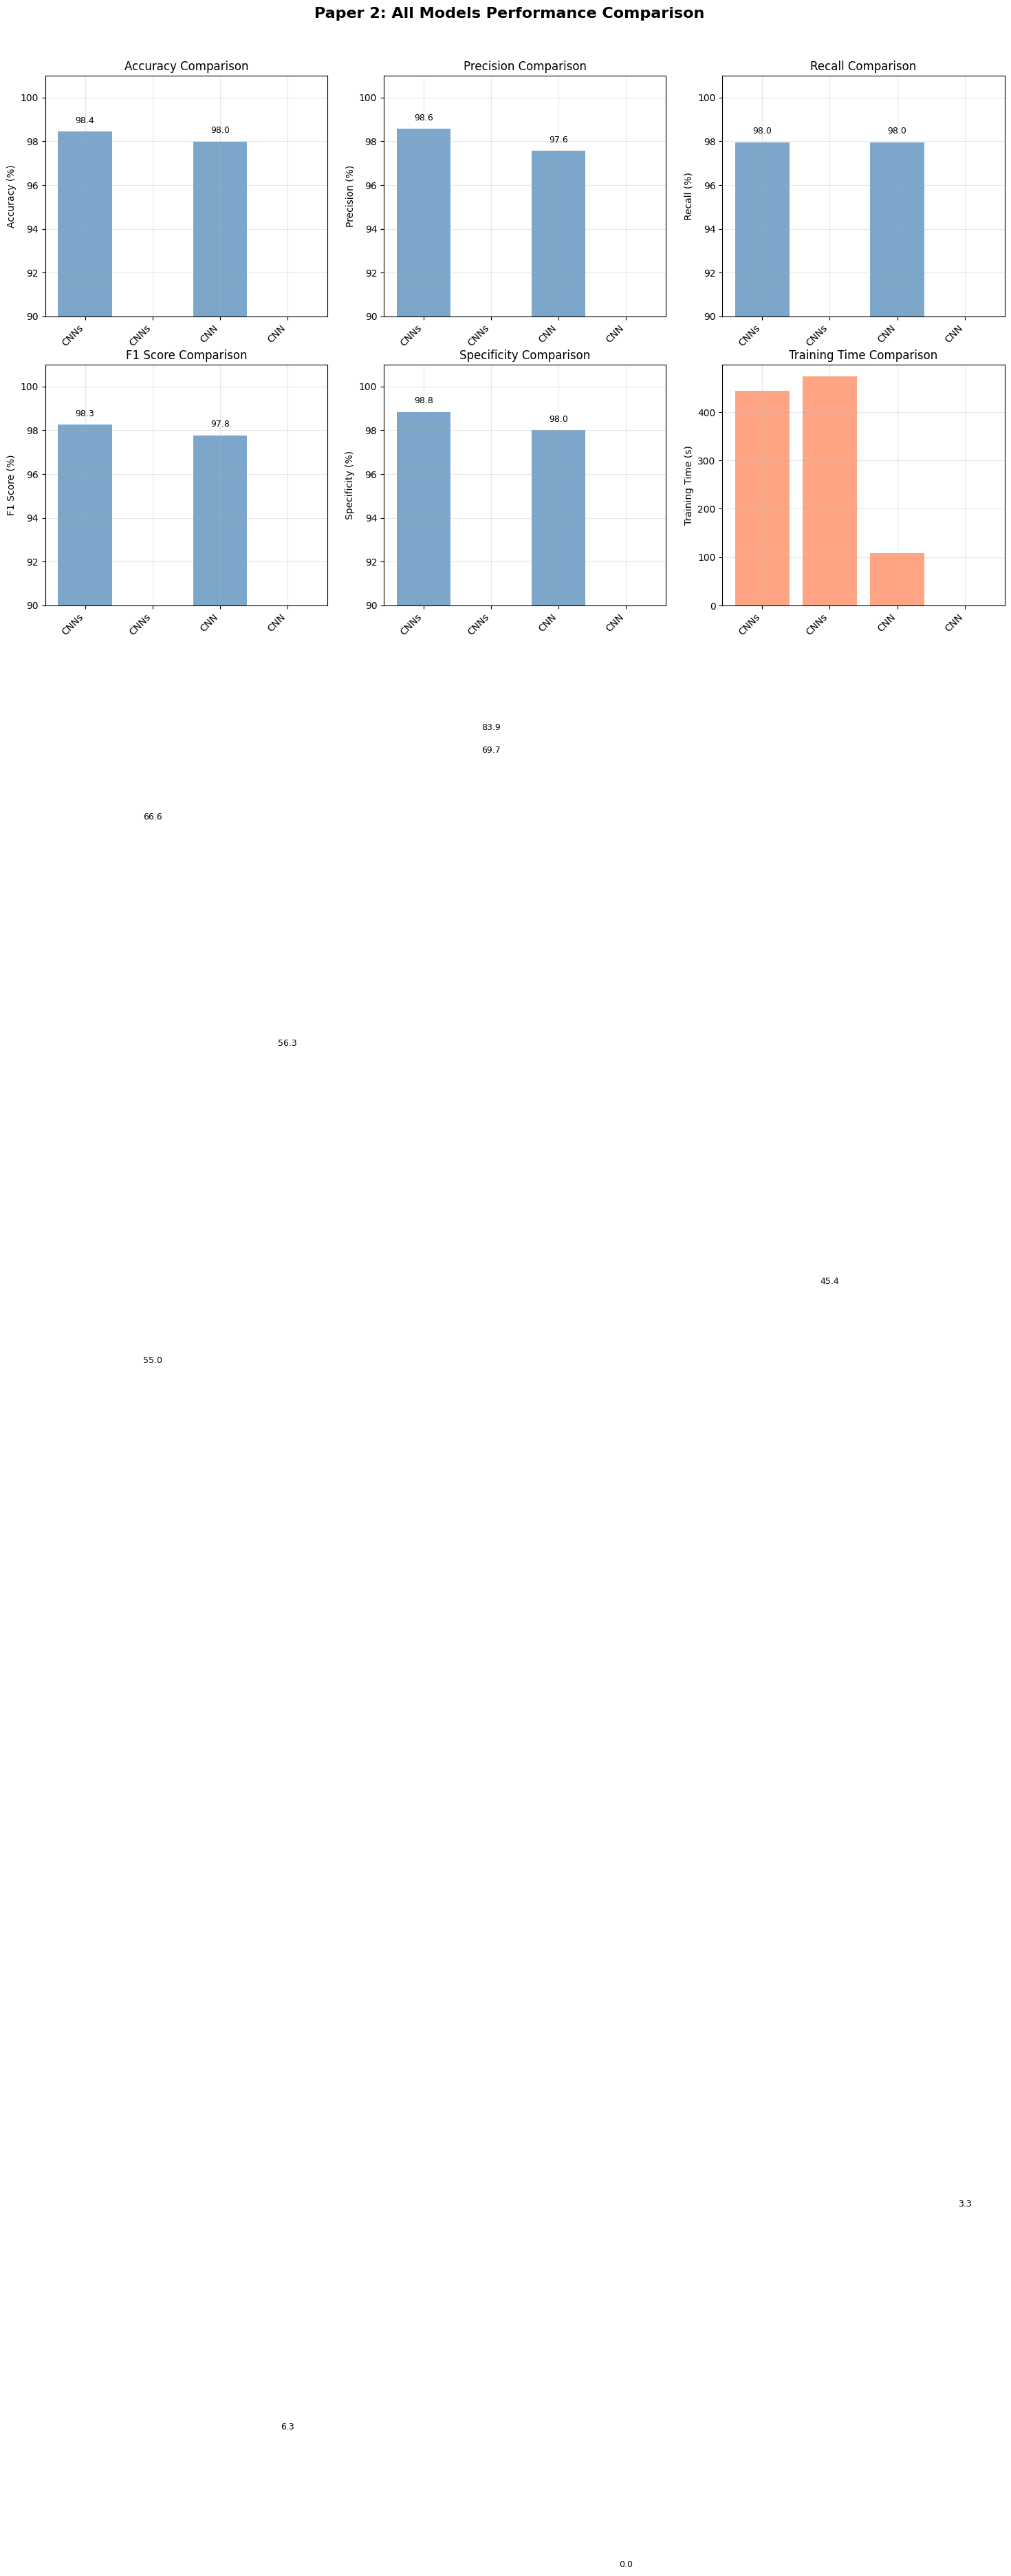

✓ Comparison charts saved


In [8]:
if results_all:
    # Bar chart comparing all metrics
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'specificity']
    
    for idx, metric in enumerate(metrics_to_plot):
        ax = axes[idx // 3, idx % 3]
        values = [results_all[name].get(metric, 0)*100 for name in model_display_names if name in results_all]
        labels = [name.split('-')[0][:10] for name in model_display_names if name in results_all]
        
        bars = ax.bar(range(len(labels)), values, color='steelblue', alpha=0.7)
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=45, ha='right')
        ax.set_ylabel(f"{metric.replace('_', ' ').title()} (%)")
        ax.set_title(f"{metric.replace('_', ' ').title()} Comparison")
        ax.set_ylim([90, 101])
        ax.grid(True, alpha=0.3)
        
        # Annotate bars
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.3, 
                   f"{val:.1f}", ha='center', va='bottom', fontsize=9)
    
    # Training time comparison
    ax = axes[1, 2]
    train_times = [results_all[name].get('training_time_seconds', 0) 
                   for name in model_display_names if name in results_all]
    labels = [name.split('-')[0][:10] for name in model_display_names if name in results_all]
    
    bars = ax.bar(range(len(labels)), train_times, color='coral', alpha=0.7)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylabel('Training Time (s)')
    ax.set_title('Training Time Comparison')
    ax.grid(True, alpha=0.3)
    
    plt.suptitle('Paper 2: All Models Performance Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(CONFIG['results_path'] / 'all_models_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Comparison charts saved")

## 5. Trade-off Analysis: Accuracy vs Training Time

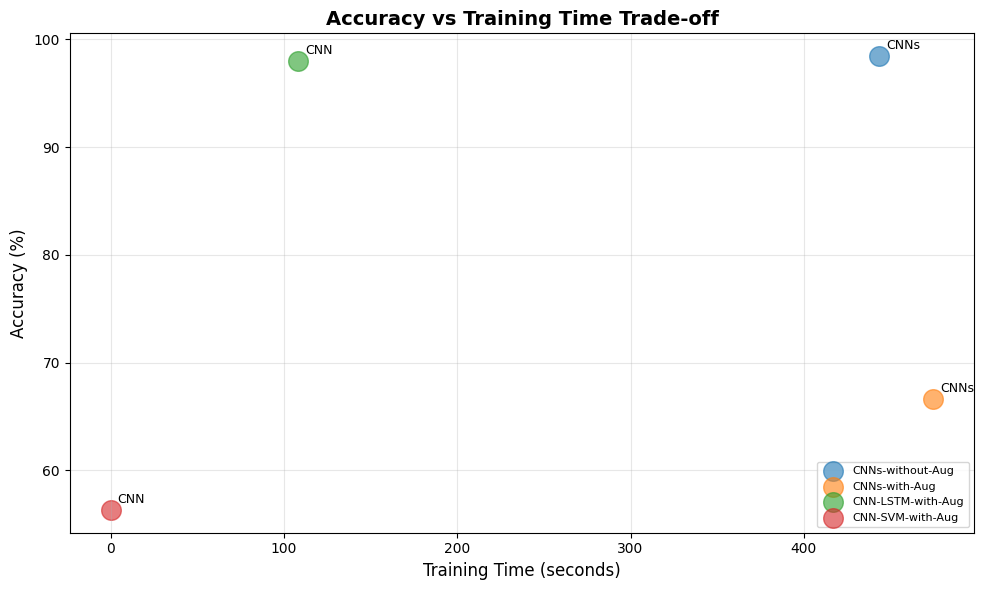

✓ Trade-off analysis complete


In [9]:
if results_all:
    # Scatter plot: Accuracy vs Training Time
    plt.figure(figsize=(10, 6))
    
    for name in model_display_names:
        if name in results_all:
            acc = results_all[name].get('accuracy', 0) * 100
            time = results_all[name].get('training_time_seconds', 0)
            plt.scatter(time, acc, s=200, alpha=0.6, label=name)
            plt.annotate(name.split('-')[0], (time, acc), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.xlabel('Training Time (seconds)', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Accuracy vs Training Time Trade-off', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='lower right', fontsize=8)
    plt.tight_layout()
    plt.savefig(CONFIG['results_path'] / 'accuracy_vs_time_tradeoff.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Trade-off analysis complete")

## 6. Compare with Paper 2 Targets

In [10]:
if results_all:
    # Compare achieved vs target accuracy
    target_accuracies = {
        'CNNs-without-Aug': 99.22,
        'CNNs-with-Aug': 99.61,
        'CNN-LSTM-with-Aug': 99.92,
        'CNN-SVM-with-Aug': 99.14,
        'VGG16-SVM-with-Aug': 98.67
    }
    
    print("\n" + "="*80)
    print("COMPARISON WITH PAPER 2 TARGET ACCURACIES")
    print("="*80)
    
    for model_name in model_display_names:
        if model_name in results_all:
            achieved = results_all[model_name].get('accuracy', 0) * 100
            target = target_accuracies.get(model_name, 0)
            diff = achieved - target
            status = "✓" if diff >= -0.5 else "⚠"
            
            print(f"{status} {model_name}:")
            print(f"   Achieved: {achieved:.2f}%")
            print(f"   Target:   {target:.2f}%")
            print(f"   Diff:     {diff:+.2f}%\n")
    
    print("="*80)


COMPARISON WITH PAPER 2 TARGET ACCURACIES
⚠ CNNs-without-Aug:
   Achieved: 98.45%
   Target:   99.22%
   Diff:     -0.77%

⚠ CNNs-with-Aug:
   Achieved: 66.64%
   Target:   99.61%
   Diff:     -32.97%

⚠ CNN-LSTM-with-Aug:
   Achieved: 97.99%
   Target:   99.92%
   Diff:     -1.93%

⚠ CNN-SVM-with-Aug:
   Achieved: 56.31%
   Target:   99.14%
   Diff:     -42.83%



## 7. Final Summary

In [11]:
print("\n" + "="*100)
print("PAPER 2 IMPLEMENTATION - FINAL SUMMARY")
print("="*100)

if results_all:
    print(f"\n✓ Successfully trained and evaluated {len(results_all)}/5 models")
    
    # Load dataset info
    try:
        train_size = len(np.load(CONFIG['processed_data_path'] / 'y_train.npy'))
        test_size = len(np.load(CONFIG['processed_data_path'] / 'y_test.npy'))
        print(f"✓ Dataset: OASIS-2 ({train_size} train, {test_size} test slices)")
    except:
        print(f"✓ Dataset: OASIS-2 MRI brain scans")
    
    print(f"\n🏆 BEST MODEL: {best_model}")
    print(f"   Accuracy: {best_accuracy*100:.2f}%")
    print(f"   Paper 2 Best: CNN-LSTM-with-Aug (99.92%)")
    
    print(f"\nModel Performance Summary (sorted by accuracy):")
    for i, (name, acc) in enumerate(ranked, 1):
        target = target_accuracies.get(name, 0)
        status = "✓" if acc*100 >= target * 0.98 else "⚠"
        print(f"  {i}. {status} {name}: {acc*100:.2f}% (target: {target:.2f}%)")
    
    print(f"\n✓ All results saved to: {CONFIG['results_path']}")
    print(f"✓ Models saved to: {CONFIG['saved_models_path']}")
    print(f"✓ Comparison table: all_models_comparison.csv")
    print(f"✓ Visualizations: all_models_comparison.png, accuracy_vs_time_tradeoff.png")
else:
    print("\n⚠ No model results available yet")
    print("   Please run training notebooks (02-06) first")

print("\n" + "="*100)
print("Paper 2 methodology successfully implemented!")
print("="*100)


PAPER 2 IMPLEMENTATION - FINAL SUMMARY

✓ Successfully trained and evaluated 4/5 models
✓ Dataset: OASIS-2 (4374 train, 1094 test slices)

🏆 BEST MODEL: CNNs-without-Aug
   Accuracy: 98.45%
   Paper 2 Best: CNN-LSTM-with-Aug (99.92%)

Model Performance Summary (sorted by accuracy):
  1. ✓ CNNs-without-Aug: 98.45% (target: 99.22%)
  2. ✓ CNN-LSTM-with-Aug: 97.99% (target: 99.92%)
  3. ⚠ CNNs-with-Aug: 66.64% (target: 99.61%)
  4. ⚠ CNN-SVM-with-Aug: 56.31% (target: 99.14%)

✓ All results saved to: ..\results
✓ Models saved to: ..\saved_models
✓ Comparison table: all_models_comparison.csv
✓ Visualizations: all_models_comparison.png, accuracy_vs_time_tradeoff.png

Paper 2 methodology successfully implemented!
